In [1]:
import os
import numpy as np
import tensorflow as tf

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# 핸즈온 머신러닝 2판 - Chapter 10 케라스를 사용한 인공 신경망 소개

## 10.1 생물학적 뉴런에서 인공 뉴런까지

### 10.1.3 퍼셉트론

붓꽃 데이터셋을 사용한 TLU 네트워크 구현

In [3]:
# Sklearn Perceptron 클래스

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

Perceptron(max_iter=100, random_state=42)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


## 10.2 케라스로 다층 퍼셉트론 구현하기

In [5]:
import tensorflow as tf
from tensorflow import keras

케라스를 사용항 데이터셋 적재하기

In [6]:
#케라스 사용하여 데이터셋 적재하기
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
#28 X 28크기의 배열

In [7]:
#픽셀 강도가 정수(0~255)로 표현
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [8]:
#전체 훈련 세트를 검증 세트와 훈련 세트로 나누고,
#경사 하강법으로 신경망을 훈련하기 위한 입력 특성의 스케일 0~1 사이 범위로 조정하기
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

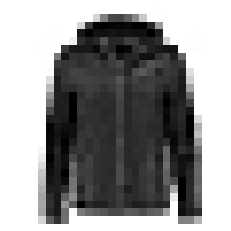

In [9]:
#matplotlib의 imshow() 함수와 binary 컬러맵을 사용해 이미지 출력
plt.imshow(X_train[0], cmap='binary')
plt.axis("off")
plt.show()

In [10]:
#레이블은 0~9까지 정수로 표현된 클래스 아이디
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

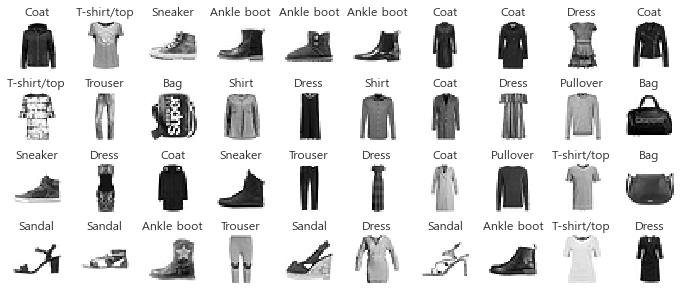

In [13]:
#샘플 이미지 출력
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace = 0.2, hspace=0.5)
plt.show()

시퀀셜 API를 사용하여 모델 만들기

In [14]:
#두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
#층의 리스트를 전달할 수도 있다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
#summary() 메서드는 모델에 있는 모든 층을 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델이 있는 층의 리시트를 출력하거나 인덱스로 층을 선택 가능하다.
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [20]:
model.get_layer('dense_3') is hidden1

True

In [21]:
#get_weight() / set_weights() 메서드를 사용해 접근할 수 있다.
weights, biases = hidden1.get_weights()
print(weights, end = "\n\n")
print(weights.shape, end = "\n\n")
print(biases.shape, end = "\n\n")
print(biases)

[[-0.01894639  0.06543933 -0.03825273 ...  0.00200585 -0.03115835
   0.02984316]
 [-0.0409848  -0.02550448  0.00464654 ...  0.00134318 -0.04329979
  -0.04472653]
 [-0.02317841  0.06932555  0.03143969 ...  0.07344779 -0.05182518
   0.0486784 ]
 ...
 [-0.05318885 -0.00221629  0.03985523 ... -0.00469378 -0.06615228
   0.06410253]
 [ 0.03888783 -0.05523992  0.04100343 ... -0.07343495 -0.05190375
   0.01391944]
 [-0.05967951  0.00680517  0.02928036 ... -0.05795221 -0.02867457
  -0.05278587]]

(784, 300)

(300,)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

모델 컴파일

In [22]:
#compile() 메서드를 호출하여 사용할 손실 함수와 옵티마이저(Optimizer)를 지정
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

모델 훈련과 평가

In [23]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 729us/step - loss: 0.7268 - accuracy: 0.7581 - val_loss: 0.5320 - val_accuracy: 0.8166
Epoch 2/30
1719/1719 [==============================] - 1s 664us/step - loss: 0.4966 - accuracy: 0.8269 - val_loss: 0.4444 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 1s 648us/step - loss: 0.4477 - accuracy: 0.8419 - val_loss: 0.5431 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 1s 708us/step - loss: 0.4198 - accuracy: 0.8536 - val_loss: 0.3984 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 1s 652us/step - loss: 0.4006 - accuracy: 0.8602 - val_loss: 0.3829 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 1s 671us/step - loss: 0.3816 - accuracy: 0.8657 - val_loss: 0.3754 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 1s 677us/step - loss: 0.3681 - accuracy: 0.8710 - val_loss: 0.3673 -

In [24]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


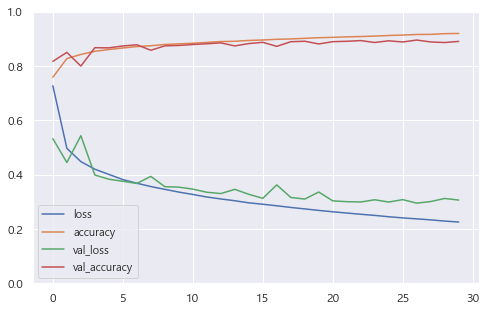

In [25]:
#Pandas를 이용한 학습 곡선 출력
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0 ,1)
plt.show()

In [26]:
#evaluate() 메서드를 통한 테스트 세트로 모델을 평가하여 일반화 오차를 추정
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 414us/step - loss: 0.3406 - accuracy: 0.8822


[0.3406089246273041, 0.8822000026702881]

모델을 사용해 예측을 만들기

In [27]:
#0~9까지 클래스마다 각각의 확률을 모델이 추정
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
#가장 높은 확률을 가진 클래스에만 관심이 있다면 predict_classes()메서드를 사용
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

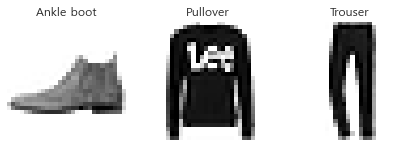

In [30]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 10.2.3 시퀀셜 API를 사용하여 회귀영 다층 퍼셉트론 만들기

In [31]:
# 사이킷런의 fetch_californial_housing() 함수를 사용해 데이터 적제
# 데이터를 적재한 후 split, 모든 특성을 스케일 조정
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 532us/step - loss: 0.7294 - val_loss: 15.9921
Epoch 2/20
363/363 [==============================] - 0s 485us/step - loss: 0.6180 - val_loss: 9.6009
Epoch 3/20
363/363 [==============================] - 0s 450us/step - loss: 0.5292 - val_loss: 0.4534
Epoch 4/20
363/363 [==============================] - 0s 908us/step - loss: 0.3957 - val_loss: 0.3639
Epoch 5/20
363/363 [==============================] - 0s 497us/step - loss: 0.3849 - val_loss: 0.3605
Epoch 6/20
363/363 [==============================] - 0s 398us/step - loss: 0.3776 - val_loss: 0.3825
Epoch 7/20
363/363 [==============================] - 0s 390us/step - loss: 0.3765 - val_loss: 0.3767
Epoch 8/20
363/363 [==============================] - 0s 392us/step - loss: 0.3689 - val_loss: 0.3864
Epoch 9/20
363/363 [==============================] - 0s 383us/step - loss: 0.3649 - val_loss: 0.4068
Epoch 10/20
363/363 [==============================] - 0s 469us/step - loss: 0.36

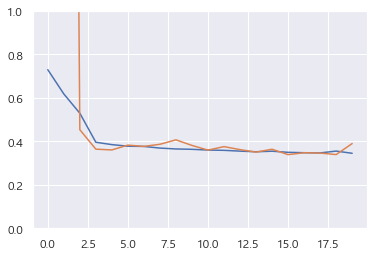

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
y_pred

array([[0.712222 ],
       [1.6680958],
       [4.128046 ]], dtype=float32)

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기

In [35]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs= [output])

In [36]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]         

In [37]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 544us/step - loss: 1.8772 - val_loss: 0.6913
Epoch 2/20
363/363 [==============================] - 0s 419us/step - loss: 0.6501 - val_loss: 0.9454
Epoch 3/20
363/363 [==============================] - 0s 433us/step - loss: 0.6012 - val_loss: 0.6622
Epoch 4/20
363/363 [==============================] - 0s 419us/step - loss: 0.5654 - val_loss: 0.5284
Epoch 5/20
363/363 [==============================] - 0s 427us/step - loss: 0.5414 - val_loss: 0.5004
Epoch 6/20
363/363 [==============================] - 0s 449us/step - loss: 0.5181 - val_loss: 0.5894
Epoch 7/20
363/363 [==============================] - 0s 431us/step - loss: 0.5035 - val_loss: 0.5889
Epoch 8/20
363/363 [==============================] - 0s 422us/step - loss: 0.4904 - val_loss: 0.4690
Epoch 9/20
363/363 [==============================] - 0s 432us/step - loss: 0.4769 - val_loss: 0.5305
Epoch 10/20
363/363 [==============================] - 0s 422us/step - loss: 0.467

여러 입력 사용하기

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [39]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 570us/step - loss: 2.0090 - val_loss: 0.9850
Epoch 2/20
363/363 [==============================] - 0s 442us/step - loss: 0.7896 - val_loss: 0.7180
Epoch 3/20
363/363 [==============================] - 0s 445us/step - loss: 0.6514 - val_loss: 0.6402
Epoch 4/20
363/363 [==============================] - 0s 450us/step - loss: 0.5991 - val_loss: 0.5778
Epoch 5/20
363/363 [==============================] - 0s 452us/step - loss: 0.5671 - val_loss: 0.5449
Epoch 6/20
363/363 [==============================] - 0s 450us/step - loss: 0.5423 - val_loss: 0.5190
Epoch 7/20
363/363 [==============================] - 0s 458us/step - loss: 0.5228 - val_loss: 0.5011
Epoch 8/20
363/363 [==============================] - 0s 445us/step - loss: 0.5073 - val_loss: 0.4808
Epoch 9/20
363/363 [==============================] - 0s 441us/step - loss: 0.4945 - val_loss: 0.4661
Epoch 10/20
363/363 [==============================] - 0s 442us/step - loss: 0.484

보조 출력 추가

In [40]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [41]:
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

In [42]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 716us/step - loss: 0.9014 - main_output_loss: 0.7646 - aux_output_loss: 2.1322 - val_loss: 2.2432 - val_main_output_loss: 2.3473 - val_aux_output_loss: 1.3063
Epoch 2/20
363/363 [==============================] - 0s 512us/step - loss: 0.5549 - main_output_loss: 0.4924 - aux_output_loss: 1.1172 - val_loss: 7.4504 - val_main_output_loss: 8.1643 - val_aux_output_loss: 1.0256
Epoch 3/20
363/363 [==============================] - 0s 510us/step - loss: 0.5726 - main_output_loss: 0.5261 - aux_output_loss: 0.9914 - val_loss: 0.5967 - val_main_output_loss: 0.4033 - val_aux_output_loss: 2.3374
Epoch 4/20
363/363 [==============================] - 0s 505us/step - loss: 0.4770 - main_output_loss: 0.4327 - aux_output_loss: 0.8757 - val_loss: 0.5180 - val_main_output_loss: 0.4091 - val_aux_output_loss: 1.4986
Epoch 5/20
363/363 [==============================] - 0s 509us/step - loss: 0.4595 - main_output_loss: 0.4236 - aux_output_loss: 0.7825 

In [43]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 368us/step - loss: 0.3673 - main_output_loss: 0.3544 - aux_output_loss: 0.4833


### 10.2.5 서브클래싱 API로 동적 모델 만들기

In [44]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [45]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 720us/step - loss: 2.1210 - output_1_loss: 1.9986 - output_2_loss: 3.2225 - val_loss: 2.8539 - val_output_1_loss: 2.5208 - val_output_2_loss: 5.8515
Epoch 2/10
363/363 [==============================] - 0s 516us/step - loss: 0.9263 - output_1_loss: 0.7926 - output_2_loss: 2.1300 - val_loss: 1.5743 - val_output_1_loss: 1.2249 - val_output_2_loss: 4.7190
Epoch 3/10
363/363 [==============================] - 0s 514us/step - loss: 0.7806 - output_1_loss: 0.6730 - output_2_loss: 1.7492 - val_loss: 1.1348 - val_output_1_loss: 0.8106 - val_output_2_loss: 4.0528
Epoch 4/10
363/363 [==============================] - 0s 529us/step - loss: 0.7027 - output_1_loss: 0.6126 - output_2_loss: 1.5139 - val_loss: 0.9375 - val_output_1_loss: 0.6529 - val_output_2_loss: 3.4992
Epoch 5/10
363/363 [==============================] - 0s 530us/step - loss: 0.6474 - output_1_loss: 0.5703 - output_2_loss: 1.3416 - val_loss: 0.7974 - val_output_1_loss: 0.552

### 10.2.6 모델 저장과 복원

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 542us/step - loss: 1.7708 - val_loss: 0.7858
Epoch 2/10
363/363 [==============================] - 0s 408us/step - loss: 0.7263 - val_loss: 0.6888
Epoch 3/10
363/363 [==============================] - 0s 402us/step - loss: 0.6499 - val_loss: 0.6225
Epoch 4/10
363/363 [==============================] - 0s 415us/step - loss: 0.6047 - val_loss: 0.5610
Epoch 5/10
363/363 [==============================] - 0s 403us/step - loss: 0.5699 - val_loss: 0.5240
Epoch 6/10
363/363 [==============================] - 0s 401us/step - loss: 0.5404 - val_loss: 0.4974
Epoch 7/10
363/363 [==============================] - 0s 398us/step - loss: 0.5160 - val_loss: 0.4785
Epoch 8/10
363/363 [==============================] - 0s 488us/step - loss: 0.4956 - val_loss: 0.4574
Epoch 9/10
363/363 [==============================] - 0s 453us/step - loss: 0.4784 - val_loss: 0.4423
Epoch 10/10
162/162 [==============================] - 0s 271us/step - loss: 0.444

In [47]:
model.save("my_keras_model.h5")

In [48]:
model = keras.models.load_model("my_keras_model.h5")

In [49]:
model.predict(X_new)

array([[0.77771765],
       [1.5822685 ],
       [3.304373  ]], dtype=float32)

### 10.2.7 콜백 사용하기

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [51]:
#ModelCheckpoint()는 훈련하는 동안 일정한 간격으로 모델의 체크포인트를 저장
#save_best_only = True로 체크포인트 지정 / 최상의 점수를 낸 모델 저장
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 672us/step - loss: 2.1781 - val_loss: 1.7808
Epoch 2/10
363/363 [==============================] - 0s 440us/step - loss: 0.8040 - val_loss: 0.8024
Epoch 3/10
363/363 [==============================] - 0s 432us/step - loss: 0.7037 - val_loss: 0.8151
Epoch 4/10
363/363 [==============================] - 0s 453us/step - loss: 0.6577 - val_loss: 0.6666
Epoch 5/10
363/363 [==============================] - 0s 461us/step - loss: 0.6218 - val_loss: 0.6082
Epoch 6/10
363/363 [==============================] - 0s 453us/step - loss: 0.5898 - val_loss: 0.5610
Epoch 7/10
363/363 [==============================] - 0s 505us/step - loss: 0.5632 - val_loss: 0.5389
Epoch 8/10
363/363 [==============================] - 0s 453us/step - loss: 0.5401 - val_loss: 0.5031
Epoch 9/10
363/363 [==============================] - 0s 453us/step - loss: 0.5199 - val_loss: 0.4796
Epoch 10/10
162/162 [==============================] - 0s 281us/step - loss: 0.480

In [52]:
#EarlyStopping 콜백을 통한 조기 종료
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 596us/step - loss: 0.4873 - val_loss: 0.4494
Epoch 2/100
363/363 [==============================] - 0s 489us/step - loss: 0.4740 - val_loss: 0.4417
Epoch 3/100
363/363 [==============================] - 0s 472us/step - loss: 0.4626 - val_loss: 0.4321
Epoch 4/100
363/363 [==============================] - 0s 446us/step - loss: 0.4526 - val_loss: 0.4403
Epoch 5/100
363/363 [==============================] - 0s 463us/step - loss: 0.4443 - val_loss: 0.4299
Epoch 6/100
363/363 [==============================] - 0s 440us/step - loss: 0.4366 - val_loss: 0.4346
Epoch 7/100
363/363 [==============================] - 0s 446us/step - loss: 0.4304 - val_loss: 0.4245
Epoch 8/100
363/363 [==============================] - 0s 454us/step - loss: 0.4247 - val_loss: 0.4177
Epoch 9/100
363/363 [==============================] - 0s 448us/step - loss: 0.4196 - val_loss: 0.4254
Epoch 10/100
363/363 [==============================] - 0s 451us/step - l

In [53]:
#더 많은 제어를 위해 사용자 정의 콜백을 만들 수 있다.
#예시로 훈련하는 동안 검증 손실과 훈련 손실의 비율을 출력
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [54]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

311/363 [========================>.....] - ETA: 0s - loss: 0.3308
val/train: 0.97
363/363 [==============================] - 0s 467us/step - loss: 0.3317 - val_loss: 0.3231


### 10.2.8 텐서보드 사용해 시각화하기

In [55]:
#텐서보드 로그를 위해 사용할 루트 로그 디렉토리 정의
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2021_08_18-18_48_49'

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [57]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 5.0296WARNING:tensorflow:From C:\Users\user\anaconda3\envs\CHB_MIT\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 0s 631us/step - loss: 1.6411 - val_loss: 0.8058
Epoch 2/30
363/363 [==============================] - 0s 459us/step - loss: 0.7431 - val_loss: 0.7239
Epoch 3/30
363/363 [==============================] - 0s 478us/step - loss: 0.6647 - val_loss: 0.6913
Epoch 4/30
363/363 [==============================] - 0s 461us/step - loss: 0.6170 - val_loss: 0.6103
Epoch 5/30
363/363 [==============================] - 0s 484us/step - loss: 0.5800 - val_loss: 0.5594
Epoch 6/30
363/363 [==============================] - 0s 583us/step - loss: 0.5484 - val_loss: 0.5367
Epoch 7/30
363/363 [=========

In [58]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006